In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline 

In [27]:
df_index = pd.read_csv('economic_index.csv')

In [28]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [29]:
df_index.drop(columns = ['Unnamed: 0' , 'year' , 'month'] , axis = 1 ,inplace=True) 


In [30]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [31]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

c:\Users\deeps\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


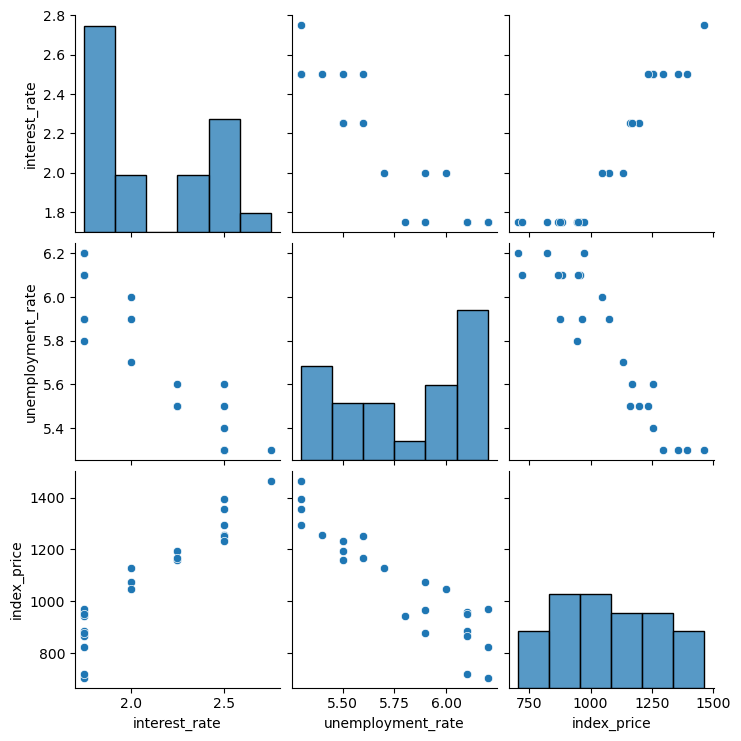

In [32]:
sns.pairplot(df_index)

In [35]:
df_index.corr()         #positive or negative relationship

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment Rate')

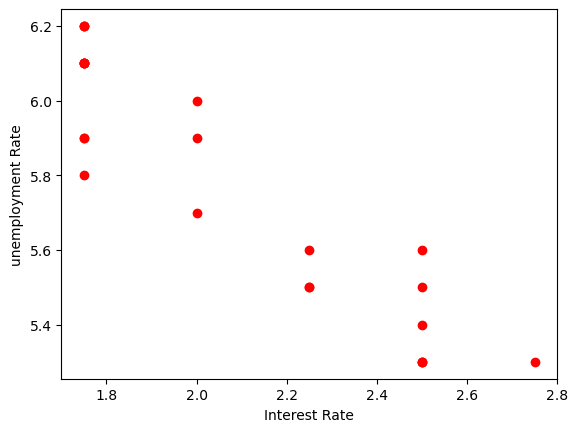

In [36]:
#Visualization data points more closely
plt.scatter(df_index['interest_rate'] , df_index['unemployment_rate'] , color = 'r')
plt.xlabel("Interest Rate")
plt.ylabel("unemployment Rate")

In [37]:
## features or independent variables

#x = df_index[['interest_rate', 'unemployment_rate']]
#y = df_index['index_price']

x = df_index.iloc[:,:-1]
y = df_index.iloc[:,-1]

In [38]:
x.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [39]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [40]:
#train test split
from sklearn.model_selection import train_test_split

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.25 , random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

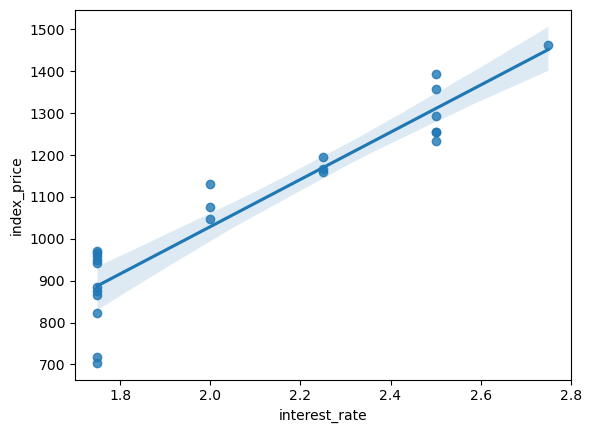

In [45]:
sns.regplot(x=df_index['interest_rate'] , y=df_index['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

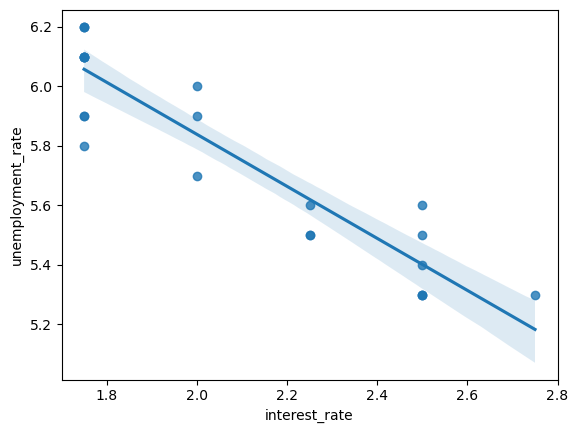

In [46]:
sns.regplot(x=df_index['interest_rate'] , y=df_index['unemployment_rate'])

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(x_train) 
X_test = scaler.transform(x_test) 

In [50]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [51]:
regression.fit(X_train,y_train)

LinearRegression()

In [54]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,X_train , y_train , scoring='neg_mean_squared_error' , cv = 3)

In [55]:
np.mean(validation_score)

-5914.828180162396

In [60]:
y_pred = regression.predict(x_test)

In [58]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [61]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [62]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred)
print(mse)

print(rmse)

print(mae)

5793.76288771258
76.11677139574813
59.93578152323556


In [63]:
from sklearn.metrics import r2_score

In [64]:
score = r2_score(y_test,y_pred)
score

0.8278978091457142

In [65]:
# display adjusted R2 score
adj_r2 = 1 - ((1 - score) * (len(y_test) -1 ) / (len(y_test) - x_test.shape[1] - 1))
adj_r2

0.713163015242857

In [66]:
## Assumptions

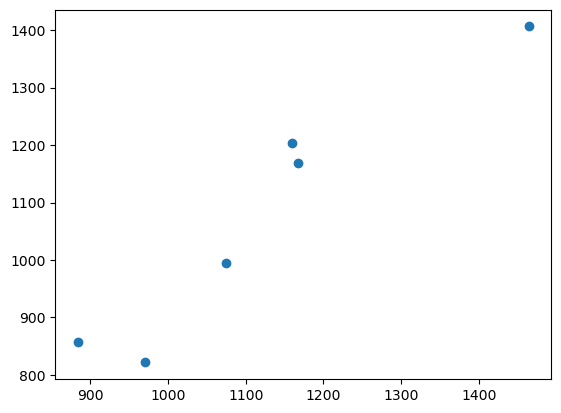

In [67]:
plt.scatter(y_test , y_pred)

In [68]:
residuals = y_test - y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


c:\Users\deeps\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


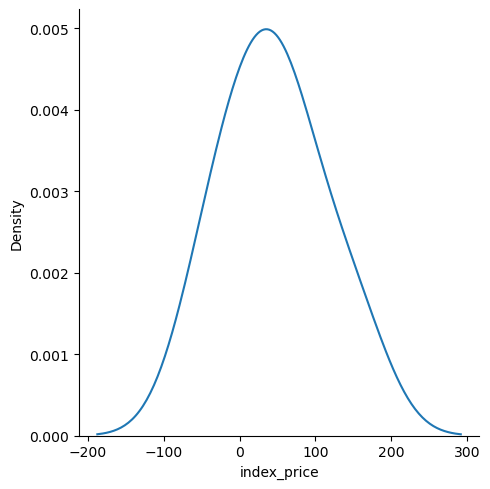

In [69]:
sns.displot(residuals , kind = 'kde')

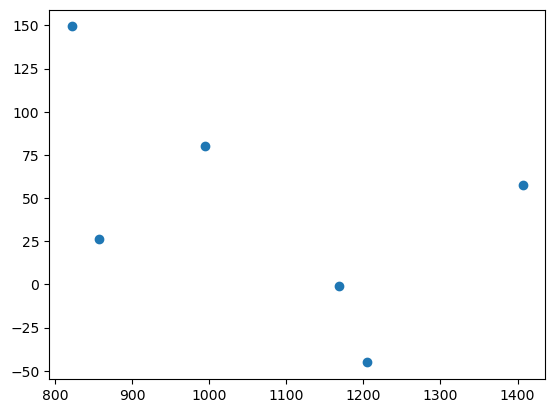

In [70]:
#scatter plot with respect to prediction and residuals
plt.scatter(y_pred , residuals)

In [71]:
import statsmodels.api as sm

In [72]:
model = sm.OLS(y_train , x_train).fit()

In [73]:
prediction = model.predict(x_test)
prediction

array([ 344.56970299, -540.55509616, 1197.78920309, -534.17403635,
       -101.18322649,  338.18864318])

In [74]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              1468.
Date:                Thu, 27 Feb 2025   Prob (F-statistic):                    7.46e-19
Time:                        01:53:34   Log-Likelihood:                         -104.21
No. Observations:                  18   AIC:                                      212.4
Df Residuals:                      16   BIC:                                      214.2
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

c:\Users\deeps\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
## Prediction for new data
regression.predict(scaler.transform([[72]]))    # again standardization

In [75]:
regression.coef_

array([  88.27275507, -116.25716066])